# Import libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
train_data = pd.read_csv(r"C:\Users\Prave\OneDrive\Desktop\assignment\Titanic Survival Rate Prediction\train.csv")
test_data = pd.read_csv(r"C:\Users\Prave\OneDrive\Desktop\assignment\Titanic Survival Rate Prediction\test.csv")

In [3]:
#Display the first rows of train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Display the columns, number of non-null, and Dtype
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Display the first rows of test data 
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Display the columns, number of non-null, and Dtype
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
"% of woman surviving",rate_women

('% of woman surviving', 0.7420382165605095)

In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
"% of men surviving",rate_men

('% of men surviving', 0.18890814558058924)

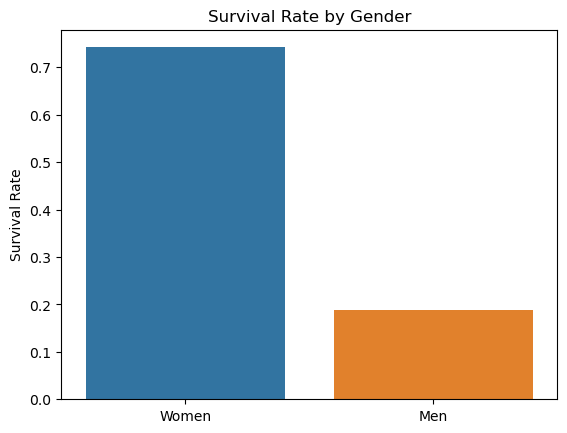

In [9]:
sns.barplot(x=['Women', 'Men'], y=[rate_women, rate_men])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

# Data Preprocessing

In [10]:
train_data.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [11]:
test_data.isnull().sum().sort_values(ascending=False).head()

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [12]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
# check the missing values after filling missing valeus
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
test_data.isnull().sum().sort_values(ascending=False)

Cabin          327
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

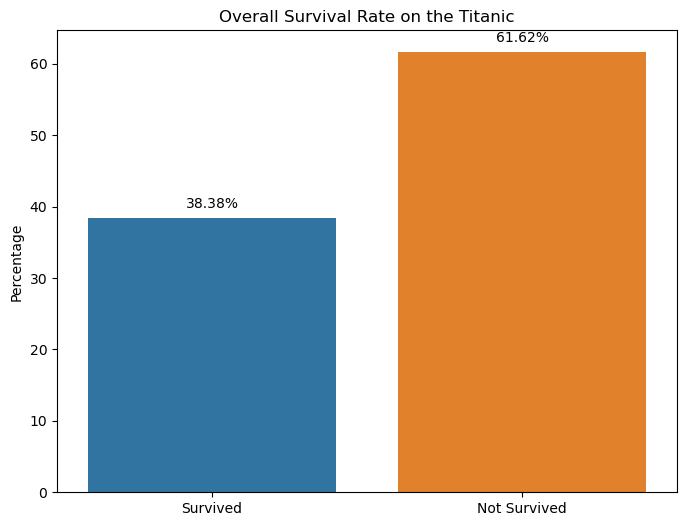

In [14]:
# Calculate the overall survival rate
survival_rate = train_data['Survived'].mean() * 100
not_survival_rate = 100 - survival_rate

# Plotting the overall survival rate
plt.figure(figsize=(8, 6))
sns.barplot(x=['Survived', 'Not Survived'], y=[survival_rate, not_survival_rate])
plt.title('Overall Survival Rate on the Titanic')
plt.ylabel('Percentage')

# Adding annotations
for index, value in enumerate([survival_rate, not_survival_rate]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

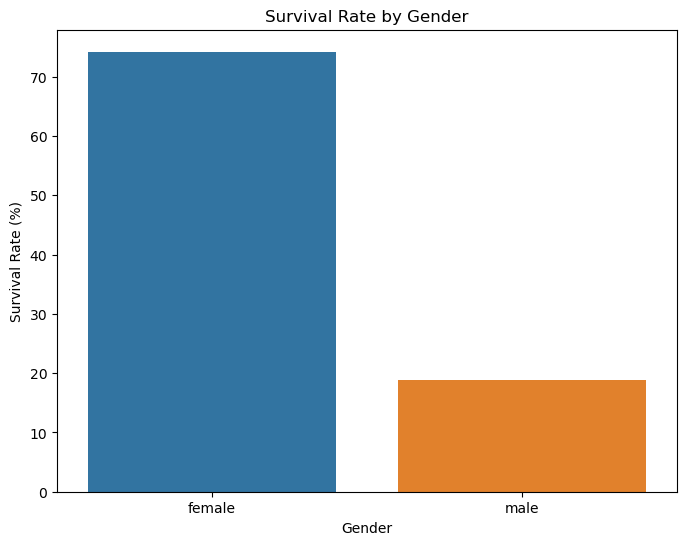

In [15]:
# Calculate survival rate by gender
survival_by_gender = train_data.groupby('Sex')['Survived'].mean() * 100

# Plotting survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.show()


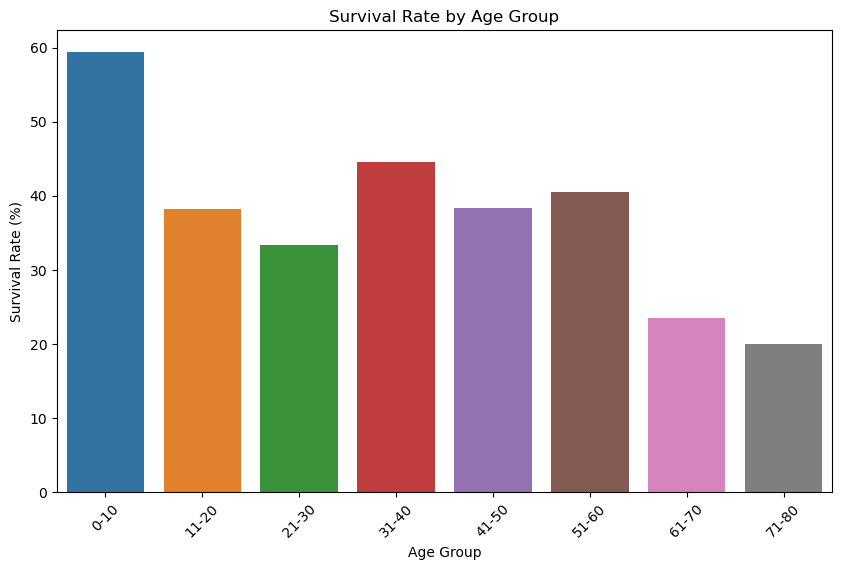

In [16]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

survival_by_age = train_data.groupby('AgeGroup')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [17]:
columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [18]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

In [19]:
X_test = pd.get_dummies(test_data[columns])
imputer = SimpleImputer(strategy='median')
X_test_imputed = imputer.fit_transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [20]:
X_train = pd.get_dummies(train_data[columns])
y_train = train_data["Survived"]

# Data Modeling

In [21]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [23]:
# Model Evaluation

In [24]:
model = RandomForestClassifier(random_state=1, **best_params)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=1)

In [25]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Average Cross-Validation Accuracy: 0.8350323269097986


In [26]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

In [27]:
X_test = pd.get_dummies(test_data[columns])
imputer = SimpleImputer(strategy='median')
X_test_imputed = imputer.fit_transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [29]:
# Model Pridction

In [30]:
predictions = model.predict(X_test_imputed)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output.head())
output.to_csv("Submission.csv", index=False)
"Submission Done"

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


'Submission Done'